In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
x=df.iloc[:,3:-1]

In [6]:
y=df.iloc[:,-1]

In [7]:
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [8]:
x=x.drop(['Geography','Gender'],axis=1)

In [9]:
x=pd.concat([x,geography,gender],axis=1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [14]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtrain)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import PReLU,ReLU,ELU,LeakyReLU
from tensorflow.keras.layers import Dropout

In [16]:
classifier=Sequential()

In [17]:
classifier.add(Dense(units=11,activation='relu'))

In [18]:
classifier.add(Dense(units=7,activation='relu'))

In [19]:
classifier.add(Dense(units=6,activation='relu'))

In [20]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [21]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
early=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [23]:
model_history=classifier.fit(xtrain,ytrain,validation_split=.33,batch_size=10,epochs=1000,callbacks=early)

Epoch 1/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.5297 - accuracy: 0.7520 - val_loss: 0.4562 - val_accuracy: 0.7959
Epoch 2/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4363 - accuracy: 0.8000 - val_loss: 0.4206 - val_accuracy: 0.8092
Epoch 3/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3992 - accuracy: 0.8291 - val_loss: 0.3948 - val_accuracy: 0.8277
Epoch 4/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3754 - accuracy: 0.8431 - val_loss: 0.3783 - val_accuracy: 0.8376
Epoch 5/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3603 - accuracy: 0.8503 - val_loss: 0.3712 - val_accuracy: 0.8417
Epoch 6/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3534 - accuracy: 0.8533 - val_loss: 0.3665 - val_accuracy: 0.8489
Epoch 7/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3495 - accuracy: 0.8548 - val_loss: 0.3654 - val_accuracy:

536/536 [==============================] - 1s 1ms/step - loss: 0.3175 - accuracy: 0.8698 - val_loss: 0.3536 - val_accuracy: 0.8516
Epoch 58/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3185 - accuracy: 0.8675 - val_loss: 0.3540 - val_accuracy: 0.8516
Epoch 59/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3176 - accuracy: 0.8683 - val_loss: 0.3533 - val_accuracy: 0.8501
Epoch 60/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3172 - accuracy: 0.8688 - val_loss: 0.3537 - val_accuracy: 0.8512
Epoch 61/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3161 - accuracy: 0.8699 - val_loss: 0.3553 - val_accuracy: 0.8561
Epoch 62/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3164 - accuracy: 0.8712 - val_loss: 0.3560 - val_accuracy: 0.8519
Epoch 63/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3166 - accuracy: 0.8673 - val_loss: 0.3529 - val_accuracy: 0.8523

In [24]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

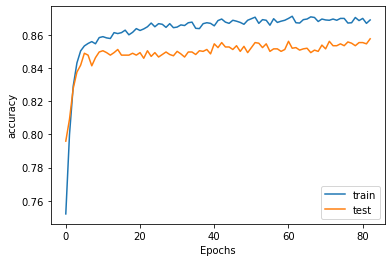

In [25]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(['train','test'])